In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import norm

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
#assign measurement class
#assign station class 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
#query measurement table to make sure session created correctly
for row in session.query(Measurement.date, Measurement.prcp, Measurement.tobs).limit(5).all():
    print(row)

('2010-01-01', 0.08, 65.0)
('2010-01-02', 0.0, 63.0)
('2010-01-03', 0.0, 74.0)
('2010-01-04', 0.0, 76.0)
('2010-01-06', None, 73.0)


In [10]:
#query station table to make sure session created correctly
for row in session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).limit(5).all():
    print(row)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date[0])

2017-08-23


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_from_last_date = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_from_last_date

# Perform a query to retrieve the data and precipitation scores
last_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= one_year_from_last_date).all()
for value in last_year:
    print(value)






('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2016-09-22', 0.75)
('2016-09-23', 0.33)
('2016-09-24', 0.27)
('2016-09-25', 0.04)
('2016-09-26', 1.02)
('2016-09-27', 1.0)
('2016-09-28', 0.05)
('2016-09-29', 1.49)
('2016-09-30', 0.38)
('2016-10-01', 1.02)
('2016-10-02', 0.61)
('2016-10-03', 0.46)
('2016-10-04', 3.46)
('2016-10-05', 0.81)
('2016-10-06', 0.04)
('2016-10-07', 0.01)
('2016-10-08', 0.04)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.35)
('2016-10-12', 0.02)
('2016-10-13', 0.06)
('2016-10-14', 0.0)
('2016-10-15', 0.33)
('2016-10-16', 0.0)
('2016-10-17', 0.38)
('2016-10-18', 0.48)
('2016-10-19', 0.0)
('2016-10-20', 1.0)
('2016-10-21', 0.09)
('2016-10-22', 1.37)
('2016-10-23', 0.24)
('2016-10-24', 0.7)
('2016-10-25', 0.4)
('2016-10-26', 0.0)
('2016-10-27', 1.25)
('2016-10-28', 0.37)
('2016-10-29', 0.25)
('2016-10-30', 0.95)
('2016-10-31', 1.35)
('2016-11-01', 0.09)
('2016-11-02', 0.04)
('2016-11-03', 0.02)
('2016-11-04', 0.06)
('2016-11-05', 0.38)
('2016-11-06', 0.05)
('2016-11-07', 0.05)
('2016-11-08', 0.53)
('

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df = pd.DataFrame(last_year, columns=['Date', 'Precipitation'])
measurement_df.set_index('Date', inplace=True)
#drop any null values
measurement_df=measurement_df.dropna(how='any')
# Sort the dataframe by date
measurement_df.sort_values(by='Date')
measurement_df


,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56


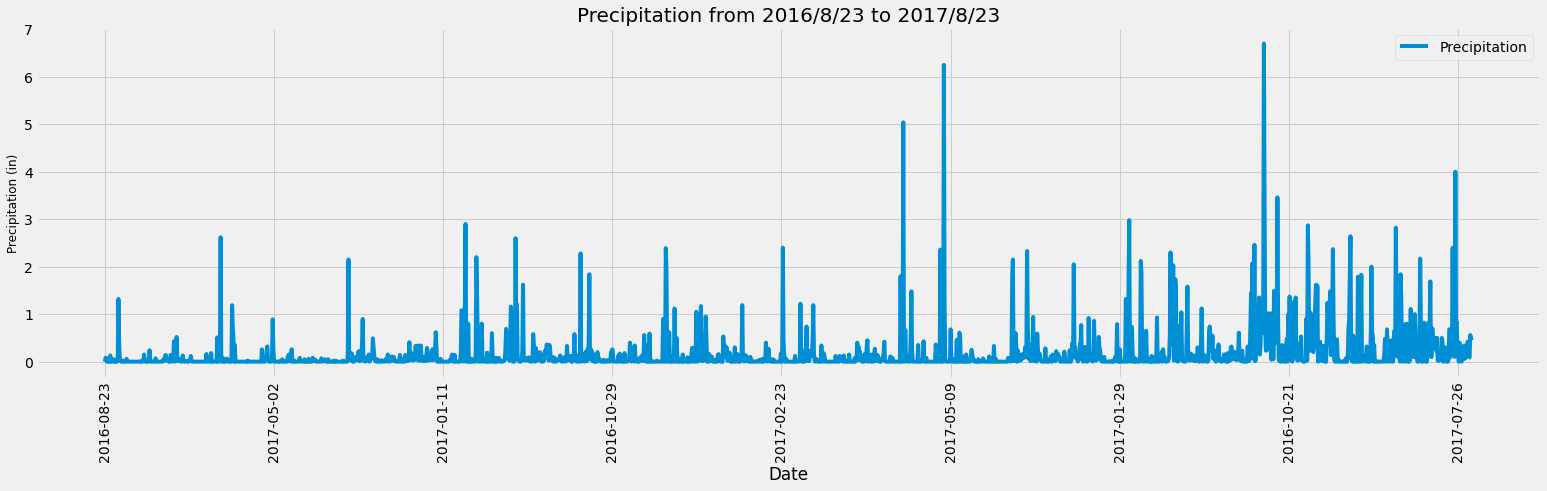

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(figsize = (24,6), rot=90);
plt.ylabel(f'Precipitation (in)', size = 12)
plt.title(f'Precipitation from 2016/8/23 to 2017/8/23', size = 20)
plt.savefig("Images/precipitation.png")
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
round(measurement_df.describe(),4)


,Precipitation
count,2021.0000
mean,0.1773
std,0.4612
min,0.0000
25%,0.0000
50%,0.0200
75%,0.1300
max,6.7000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.station.distinct()).filter(Station.station.isnot(None)).count()
total_stations
print(f'total number of stations is: {total_stations}')

total number of stations is: 9


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
act_station = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).all()
act_station                             

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
#get most active station id
most_active_station = session.query(Measurement.station).group_by(Measurement.station).\
order_by(func.count(Measurement.date).desc()).first()
most_active_station_id = most_active_station[0]
most_active_station_id
print(f'most active station is: {most_active_station_id}')

most active station is: USC00519281


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lha_station_id = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active_station_id).all()

# print output
for lowest_temp, highest_temp, average_temp in lha_station_id:
    print(f'The lowest temp at {most_active_station_id} is {lowest_temp}.')
    print(f'The highest temp at {most_active_station_id} is {highest_temp}.')
    print(f'The average temp at {most_active_station_id} is {average_temp}.')

The lowest temp at USC00519281 is 54.0.
The highest temp at USC00519281 is 85.0.
The average temp at USC00519281 is 71.66378066378067.


In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_12 = session.query(Measurement.date, Measurement.tobs)\
.filter(Measurement.station == most_active_station_id, Measurement.date.between(one_year_from_last_date, dt.date(2017,8,23)))\
.group_by(Measurement.date)\
.order_by(Measurement.date)

for station in temp_12:
    print(station)

('2016-08-23', 77.0)
('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09'

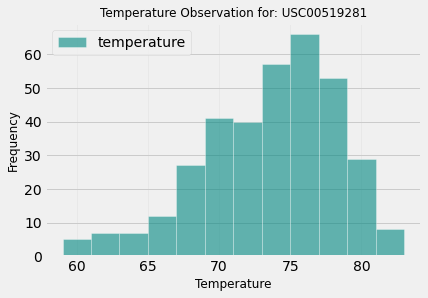

In [21]:
#plot histogram
temp_12_df = pd.DataFrame(temp_12, columns=['Date','Temp'])
temp_12_df.set_index('Date', inplace=True)
plt.xlabel('Temperature', fontsize='12')
plt.ylabel('Frequency', fontsize='12')
plt.title(f'Temperature Observation for: {most_active_station_id}', fontsize='12')
plt.hist(temp_12_df, bins=12, alpha=.6, color = '#008881', label='temperature', edgecolor='w')
plt.grid(axis='x', alpha=.2)
plt.legend();
plt.savefig("Images/station_histogram.png")

# Close session

In [22]:
# Close Session
session.close()

In [ ]:
gb